# 7. Naive Bayes Algorithm

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Read the CSV file 'diabetes.csv' into a pandas DataFrame 'df'
df = pd.read_csv("diabetes.csv")

In [3]:
# Shows a tuple with row and column size
df.shape

(2460, 9)

In [4]:
# Display a concise summary of the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [5]:
# Returns the first few rows of the DataFrame df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Check for missing values (NaNs) in each column of the DataFrame 'df' and compute their sum
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Generate descriptive statistics for the DataFrame 'df'
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Three Interesting insights from Dataset

### 1.Distribution of Glucose Levels
Glucose levels play a crucial role in diagnosing diabetes. By plotting the distribution, we can see the spread and concentration of glucose values in the dataset

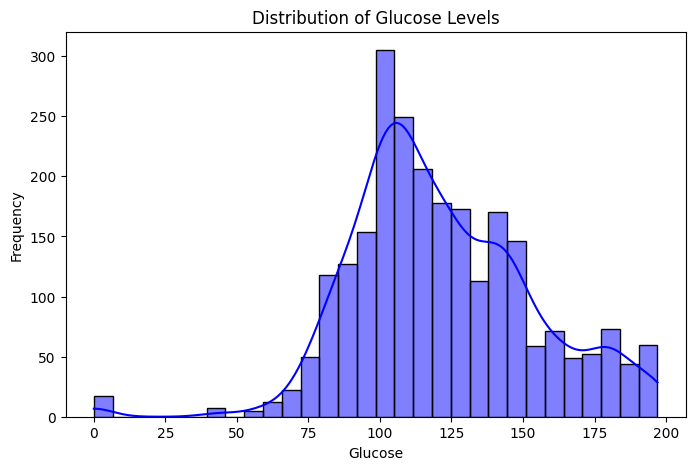

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Glucose"], kde=True, bins=30, color='blue')
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

### 2.Age vs. Diabetes Outcome
Age can be an important factor in diabetes risk.By comparing the age distribution of diabetics  we can check what type of  people are more likely to have diabetes.

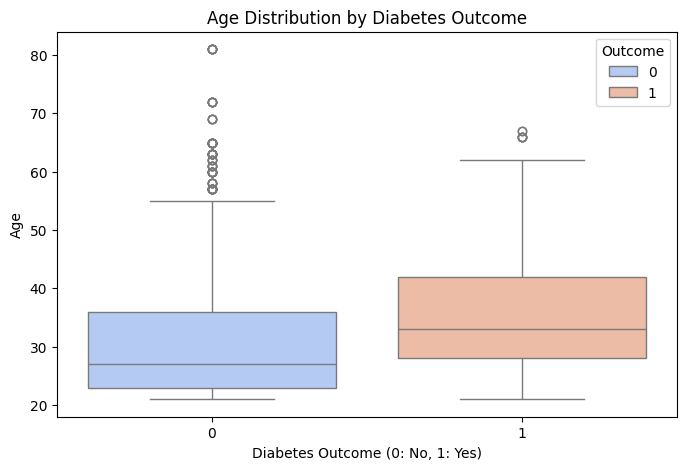

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Age', data=df, hue='Outcome', palette='coolwarm', dodge=False)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0: No, 1: Yes)")
plt.ylabel("Age")
plt.show()


### 3.Blood Pressure Distribution by Outcome
Blood pressure levels may vary between diabetic and non-diabetic individuals.A comparison of blood pressure distributions for both groups can reveal if high blood pressure is more common among diabetic individuals.

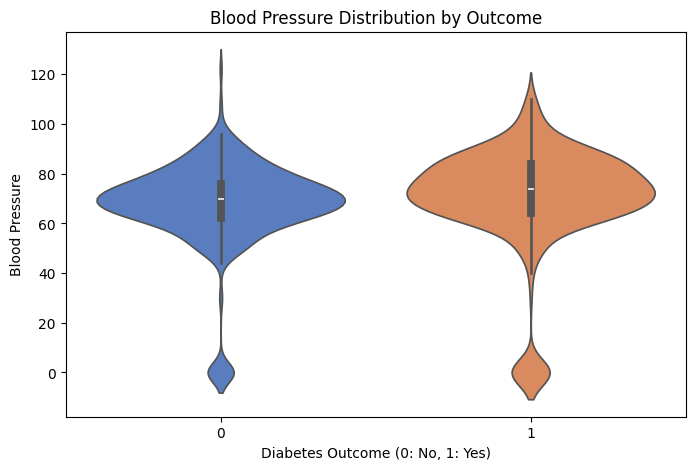

In [10]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Outcome", y="BloodPressure", data=df, hue="Outcome", palette="muted", legend=False)
plt.title("Blood Pressure Distribution by Outcome")
plt.xlabel("Diabetes Outcome (0: No, 1: Yes)")
plt.ylabel("Blood Pressure")
plt.show()


In [11]:
# Create a new DataFrame 'x' by dropping the column "Outcome" from the original DataFrame 'df'
x = df.drop(columns= "Outcome")
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
2455,3,126,88,41,235,39.3,0.704,27
2456,4,123,62,0,0,32.0,0.226,35
2457,1,80,74,11,60,30.0,0.527,22
2458,1,96,64,27,87,33.2,0.289,21


In [12]:
# Create a Series 'y' containing data from the column "Outcome" of the original DataFrame 'df'
y = df["Outcome"]
y

0       1
1       0
2       1
3       0
4       1
       ..
2455    0
2456    1
2457    0
2458    0
2459    0
Name: Outcome, Length: 2460, dtype: int64

In [13]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

Feature Scaling to bring the variable in a single scale

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
# Create a Gaussian Naive Bayes classifier object
nb = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)  # Generates 10 values between 1e-9 and 1e0
}
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model using the training data (x_train, y_train)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)



Best Hyperparameters: {'var_smoothing': np.float64(1e-09)}


Train Naive Bayes Classifier with Best Parameters

In [16]:
# Create a Gaussian Naive Bayes classifier object
nb = GaussianNB(var_smoothing=1e-9) 
nb.fit(x_train, y_train)

GaussianNB()

In [17]:
# Use the best model from GridSearchCV to predict on the test data
best_nb = grid_search.best_estimator_

# Predict the target variable for the test data
y_pred = best_nb.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [18]:
cm = confusion_matrix( y_test, y_pred)
cm

array([[361,  83],
       [110, 184]])

### Plotting the confusion matrix


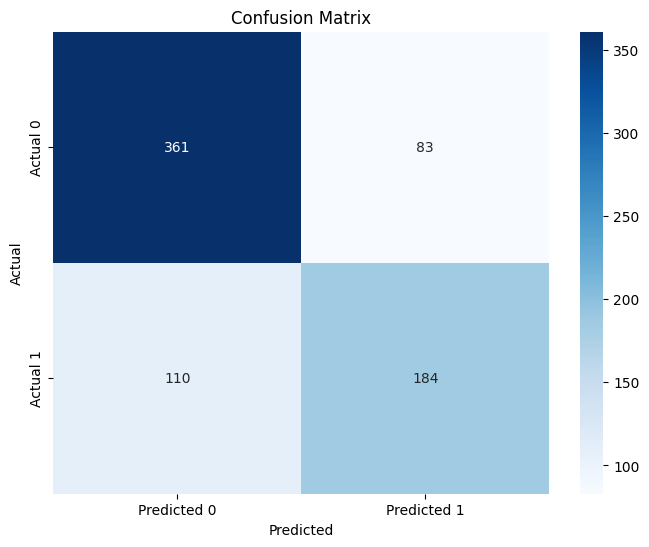

In [19]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
# Calculate the accuracy score of the predictions made by the Gaussian Naive Bayes classifier model
nb_ac = accuracy_score(y_test, y_pred)
nb_ac

0.7384823848238482

In [21]:
# Generate a classification report based on the actual and predicted values
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.81      0.79       444
           1       0.69      0.63      0.66       294

    accuracy                           0.74       738
   macro avg       0.73      0.72      0.72       738
weighted avg       0.74      0.74      0.74       738



Visualizing Actual vs Predicted Values

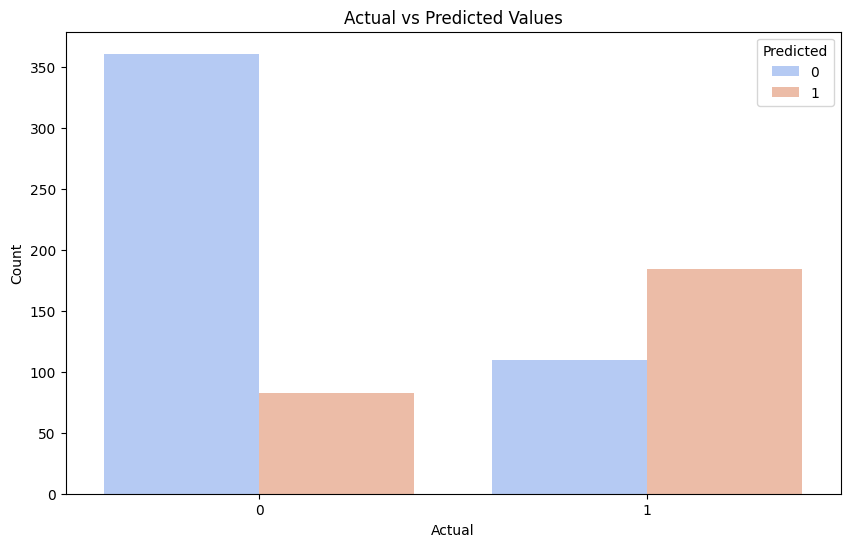

In [22]:
# Create a DataFrame for actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot a bar plot comparing actual vs predicted
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=comparison_df, palette='coolwarm')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Count')
plt.show()